In [99]:
import pandas as pd

In [100]:
dados = pd.read_csv('emp_automovel.csv')

In [101]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [102]:
x = dados.drop("inadimplente", axis=1)
y = dados["inadimplente"]

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [105]:
print("Accuracy: ", modelo.score(x, y))

Accuracy:  1.0


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x, x_test, y, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)

In [108]:
modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)
print("Accuracy: ", modelo.score(x_train, y_train))
print("Accuracy: ", modelo.score(x_val, y_val))
print("Accuracy: ", modelo.score(x_test, y_test))

Accuracy:  1.0
Accuracy:  0.8472927856002322
Accuracy:  0.846618953603159


In [109]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train, y_train)
print("Train Accuracy: ", modelo.score(x_train, y_train))
print("Validation Accuracy: ", modelo.score(x_val, y_val))
print("Test Accuracy: ", modelo.score(x_test, y_test))

Train Accuracy:  0.9207573273211723
Validation Accuracy:  0.9059370010161126
Test Accuracy:  0.9070829220138203


In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
y_predict = modelo.predict(x_val)
cm = confusion_matrix(y_val, y_predict)
print(cm)

[[6224   64]
 [ 584   17]]


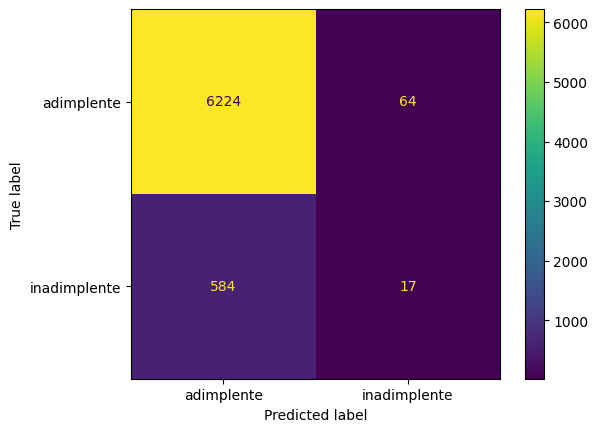

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

visualization = ConfusionMatrixDisplay(cm, display_labels = ['adimplente', 'inadimplente'])
visualization.plot();

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
print(f'Accuracy: {accuracy_score(y_val, y_predict) * 100:.2f}%')

Accuracy: 90.59%


In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [116]:
print(f'Precisão: {precision_score(y_val, y_predict) * 100:.2f}%')
print(f'Recall: {recall_score(y_val, y_predict) * 100:.2f}%')
print(f'F1 Score: {f1_score(y_val, y_predict) * 100:.2f}%')

Precisão: 20.99%
Recall: 2.83%
F1 Score: 4.99%


In [117]:
from sklearn.metrics import RocCurveDisplay

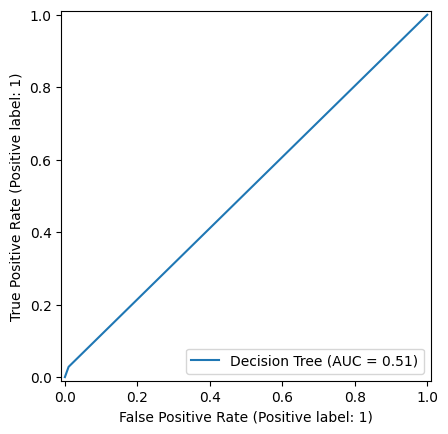

In [118]:
RocCurveDisplay.from_predictions(y_val, y_predict, name='Decision Tree');

In [119]:
from sklearn.metrics import roc_auc_score

In [120]:
print(f'ROC AUC: {roc_auc_score(y_val, y_predict) * 100:.2f}%')

ROC AUC: 50.91%


In [121]:
from sklearn.metrics import PrecisionRecallDisplay

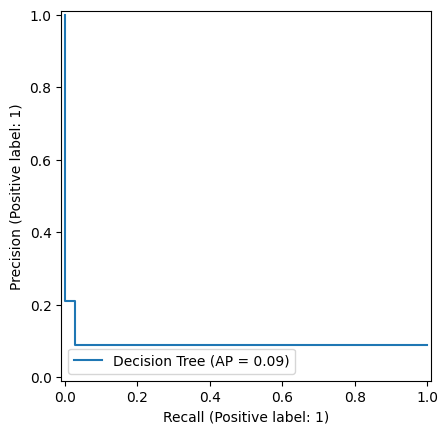

In [122]:
PrecisionRecallDisplay.from_predictions(y_val, y_predict, name='Decision Tree');

In [123]:
from sklearn.metrics import average_precision_score

In [124]:
print(f'Average Precision: {average_precision_score(y_val, y_predict) * 100:.2f}%')

Average Precision: 9.07%


In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6288
           1       0.21      0.03      0.05       601

    accuracy                           0.91      6889
   macro avg       0.56      0.51      0.50      6889
weighted avg       0.85      0.91      0.87      6889



In [127]:
from sklearn.model_selection import cross_validate, KFold

In [128]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(modelo, x, y, cv=kf)
cv_results 

{'fit_time': array([0.11966109, 0.11986256, 0.11925983, 0.12377763, 0.11638522]),
 'score_time': array([0.00200033, 0.00200129, 0.00350714, 0.00200033, 0.00200009]),
 'test_score': array([0.91301034, 0.9070122 , 0.90712108, 0.9135453 , 0.89884582])}

In [129]:
cv_results['test_score']

array([0.91301034, 0.9070122 , 0.90712108, 0.9135453 , 0.89884582])

In [130]:
media = cv_results['test_score'].mean()
desvio_padrao = cv_results['test_score'].std()
print(f'Intervalo de confiança: {media - 2 * desvio_padrao} - {min(media + 2 * desvio_padrao, 1)}')

Intervalo de confiança: 0.8972727435870631 - 0.918541149690683


In [131]:
def intervalo_confianca(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f'Intervalo de confiança: {media - 2 * desvio_padrao} - {min(media + 2 * desvio_padrao, 1)}')

In [132]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(modelo, x, y, cv=kf, scoring='recall')
cv_results 

{'fit_time': array([0.11814809, 0.11782217, 0.12182713, 0.11464858, 0.11609173]),
 'score_time': array([0.00350237, 0.00299954, 0.00300789, 0.0045042 , 0.00400352]),
 'test_score': array([0.02377807, 0.02227723, 0.0196802 , 0.01697128, 0.02543353])}

In [133]:
intervalo_confianca(cv_results)

Intervalo de confiança: 0.015627705867408644 - 0.027628414630144614


In [134]:
dados['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [135]:
from sklearn.model_selection import StratifiedKFold

modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(modelo, x, y, cv=skf, scoring='recall')
cv_results

{'fit_time': array([0.12265992, 0.11765623, 0.11712885, 0.11712456, 0.11673999]),
 'score_time': array([0.00302315, 0.00299931, 0.00400138, 0.00250673, 0.00300121]),
 'test_score': array([0.03740648, 0.02746567, 0.0286783 , 0.02369077, 0.02369077])}

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_resample(x, y)

In [138]:
y_balanced.value_counts(normalize=True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [139]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(modelo, x_balanced, y_balanced, cv=skf, scoring='recall')

intervalo_confianca(cv_results)

Intervalo de confiança: 0.7129605852691002 - 0.738843623706963


In [140]:
from imblearn.pipeline import Pipeline as imbpipeline

In [141]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [142]:
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')


In [143]:
intervalo_confianca(cv_results)

Intervalo de confiança: 0.1997357836400652 - 0.3200901197662131


In [144]:
from imblearn.under_sampling import NearMiss

In [159]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
cv_results

{'fit_time': array([0.10208011, 0.10308027, 0.10258412, 0.10107398, 0.10008025]),
 'score_time': array([0.00300026, 0.00300002, 0.00300407, 0.00300026, 0.00350809]),
 'test_score': array([0.680798  , 0.62421973, 0.67206983, 0.67581047, 0.65336658])}

In [146]:
intervalo_confianca(cv_results)

Intervalo de confiança: 0.6234251677689584 - 0.6960887814404151


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



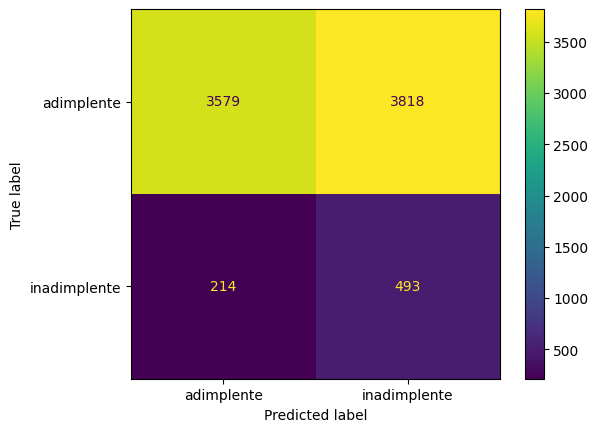

In [154]:
undersample = NearMiss(version=3)
x_balanced, y_balanced = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balanced, y_balanced)

y_predict = modelo.predict(x_test)

print(f'Classification Report: \n{classification_report(y_test, y_predict)}')
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=['adimplente', 'inadimplente']);

In [157]:
from imblearn.combine import SMOTEENN


In [158]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('combine', SMOTEENN()), ('arvore', modelo)])
sfk = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
intervalo_confianca(cv_results)

Intervalo de confiança: 0.24259733916343823 - 0.4184329814146422


In [162]:
dados['inadimplente'].value_counts()

inadimplente
0    49309
1     4716
Name: count, dtype: int64